# Regularization with Tree-based Models

## Building a classification tree

In [1]:
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [2]:
# Load the dataset
X, y = load_iris(return_X_y=True)

In [3]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

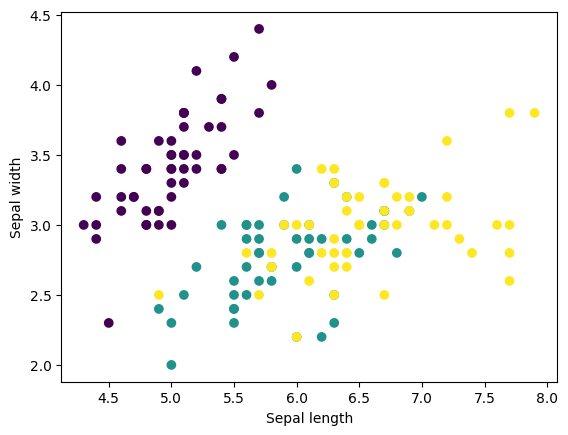

In [4]:
# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()

In [5]:
# Instantiate the model
dt = DecisionTreeClassifier()
# Fit the model on the training data

In [6]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [7]:
# Compute the accuracy on training and test sets
print('Accuracy on training set:', dt.score(X_train, y_train))
print('Accuracy on test set:', dt.score(X_test, y_test))

Accuracy on training set: 1.0
Accuracy on test set: 0.9736842105263158


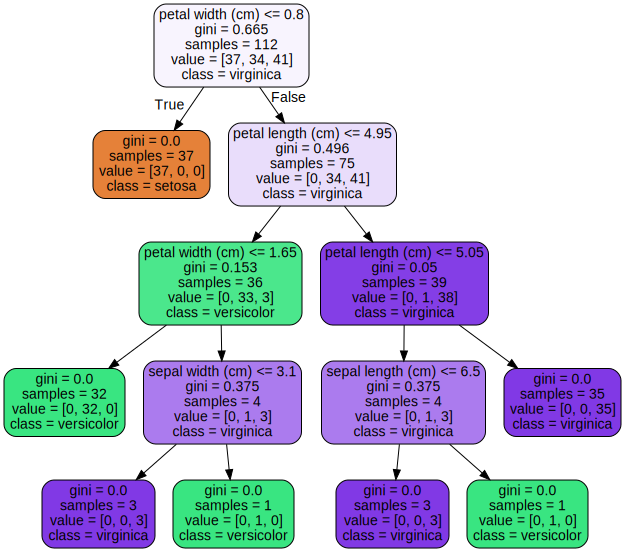

In [8]:
from sklearn.tree import export_graphviz
import graphviz

# We load iris data again to retrieve features and classes names
iris = load_iris()

# We export the tree in graphviz format 
graph_data = export_graphviz(
    dt,
    out_file=None,
    feature_names=iris.feature_names,  
    class_names=iris.target_names,  
    filled=True, rounded=True
)

# We load the tree again with graphviz library in order to display it
graphviz.Source(graph_data)

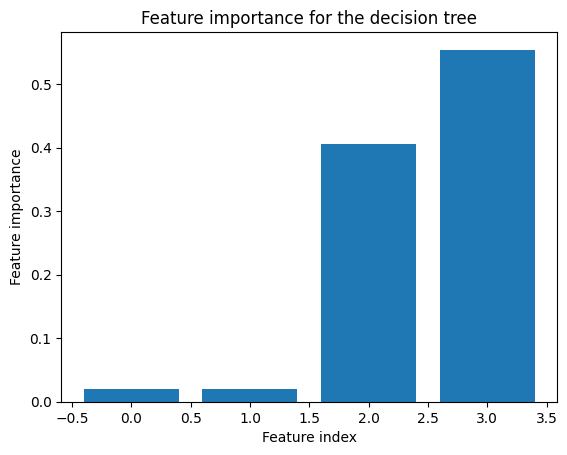

In [9]:
import numpy as np
plt.bar(np.arange(4), dt.feature_importances_)
plt.xlabel('Feature index')
plt.ylabel('Feature importance')
plt.title('Feature importance for the decision tree')
plt.show()

## Building a Regression Trees

In [10]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [11]:
X, y = fetch_california_housing(return_X_y=True)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [13]:
dt = DecisionTreeRegressor()

In [14]:
dt.fit(X_train, y_train)

DecisionTreeRegressor()

In [15]:
print('R2-score on training set:', dt.score(X_train, y_train))
print('R2-score on test set:', dt.score(X_test, y_test))

R2-score on training set: 1.0
R2-score on test set: 0.5904829407612706


## Regularizing a decision tree

In [16]:
def plot_decision_function(dt, X, y):
    # Create figure to draw chart
    plt.figure(2, figsize=(8, 6))

    # We create a grid of points contained within [x_min, x_max]x[y_min, y_max] with step h=0.02
    x0_min, x0_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    x1_min, x1_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = .02  # step size of the grid
    xx0, xx1 = np.meshgrid(np.arange(x0_min, x0_max, h), np.arange(x1_min, x1_max, h))

    # Retrieve predictions for each point of the grid
    Z_dt = dt.predict(np.c_[xx0.ravel(), xx1.ravel()])
    Z_dt = Z_dt.reshape(xx0.shape)

    # Plot the decision boundary (label predicted assigned to a color)
    plt.pcolormesh(xx0, xx1, Z_dt, cmap=plt.cm.Paired)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)

    # Format chart
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xticks(())
    plt.yticks(())
    plt.show()

In [17]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [18]:
X, y = load_iris(return_X_y=True)
# Keep only 2 features
X = X[:, :2]

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [20]:
dt = DecisionTreeClassifier(max_depth=5, random_state=0)

In [21]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=0)

In [22]:
print('Accuracy on training set:', dt.score(X_train, y_train))
print('Accuracy on test set:', dt.score(X_test, y_test))

Accuracy on training set: 0.8660714285714286
Accuracy on test set: 0.6578947368421053


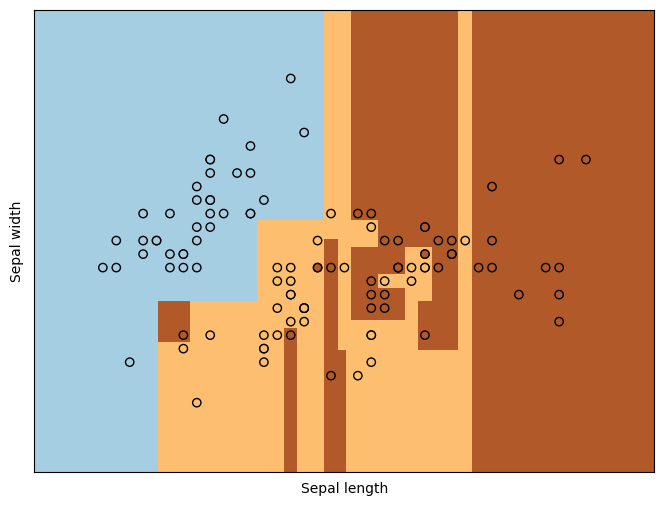

In [23]:
import numpy as np
from matplotlib import pyplot as plt
# Fit a decision tree over only 2 features
dt = DecisionTreeClassifier()
dt.fit(X_train[:, :2], y_train)
# Plot the decision tree decision function
plot_decision_function(dt, X_train[:, :2], y_train)

In [24]:
# Compute the accuracy on training and test sets for only 2 features
print('Accuracy on training set:', dt.score(X_train[:, :2], y_train))
print('Accuracy on test set:', dt.score(X_test[:, :2], y_test))

Accuracy on training set: 0.9375
Accuracy on test set: 0.6578947368421053


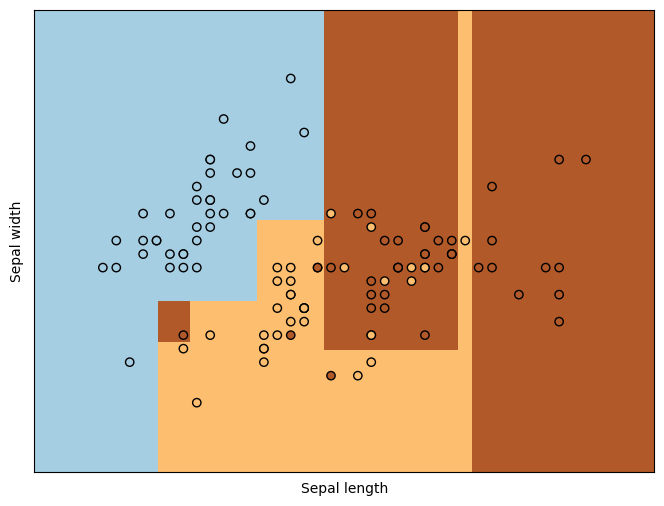

In [25]:
# Fit a decision tree with max depth of 5 over only 2 features
dt = DecisionTreeClassifier(max_depth=5, random_state=0)
dt.fit(X_train[:, :2], y_train)
# Plot the decision tree decision function
plot_decision_function(dt, X_train[:, :2], y_train)

In [26]:
# Compute the accuracy on training and test sets for only 2 features
print('Accuracy on training set:', dt.score(X_train[:, :2], y_train))
print('Accuracy on test set:', dt.score(X_test[:, :2], y_test))

Accuracy on training set: 0.8660714285714286
Accuracy on test set: 0.6578947368421053


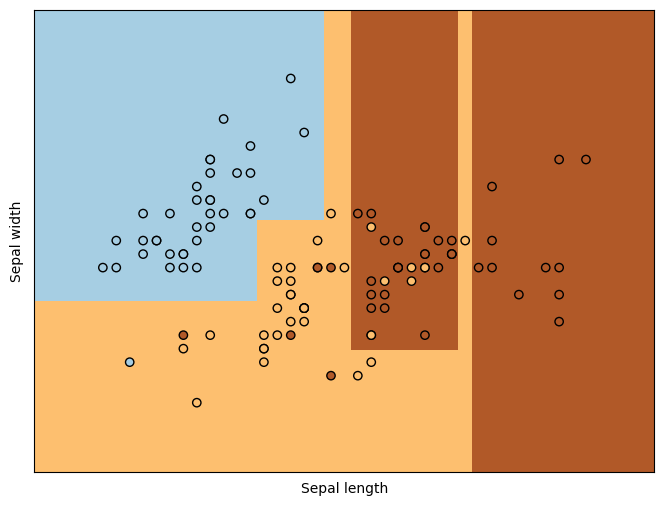

In [27]:
# Fit a decision tree with min samples per split of 15 over only 2 features
dt = DecisionTreeClassifier(min_samples_split=15, random_state=0)
dt.fit(X_train[:, :2], y_train)
# Plot the decision tree decision function
plot_decision_function(dt, X_train[:, :2], y_train)

In [28]:
# Compute the accuracy on training and test sets for only 2 features
print('Accuracy on training set:', dt.score(X_train[:, :2], y_train))
print('Accuracy on test set:', dt.score(X_test[:, :2], y_test))

Accuracy on training set: 0.8571428571428571
Accuracy on test set: 0.7368421052631579


## Training a Random Forest

In [29]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [30]:
X, y = fetch_california_housing(return_X_y=True)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [32]:
rf = RandomForestRegressor(random_state=0)

In [33]:
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [34]:
# Display the accuracy on both training and test set
print('R2-score on training set:', rf.score(X_train, y_train))
print('R2-score on test set:', rf.score(X_test, y_test))

R2-score on training set: 0.9727159677969947
R2-score on test set: 0.7941678302821006


## Regularization of a Random Forest

In [35]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [36]:
X, y = fetch_california_housing(return_X_y=True)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [38]:
rf = RandomForestRegressor(max_features='log2', random_state=0)

In [39]:
rf.fit(X_train, y_train)

RandomForestRegressor(max_features='log2', random_state=0)

In [40]:
print('R2-score on training set:', rf.score(X_train, y_train))
print('R2-score on test set:', rf.score(X_test, y_test))

R2-score on training set: 0.9748218476882353
R2-score on test set: 0.8137208340736402


## Training a Boosting model with XGBoost

In [41]:
import pickle
from xgboost import XGBClassifier

/home/vince/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [42]:
X_train, X_test, y_train, y_test = pickle.load(open('prepared_titanic.pkl', 'rb'))

In [43]:
bst = XGBClassifier(use_label_encoder=False)

In [44]:
# Train the model on training set
bst.fit(X_train, y_train)

[11:03:30] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [45]:
print('Accuracy on training set:', bst.score(X_train, y_train))
print('Accuracy on test set:', bst.score(X_test, y_test))

Accuracy on training set: 0.9747191011235955
Accuracy on test set: 0.8156424581005587


## Regularization with XGBoost

In [46]:
import pickle
from xgboost import XGBClassifier

In [47]:
X_train, X_test, y_train, y_test = pickle.load(open('prepared_titanic.pkl', 'rb'))

In [48]:
bst = XGBClassifier(use_label_encoder=False, reg_alpha=1)

In [49]:
bst.fit(X_train, y_train)

[11:03:31] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=1, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [50]:
print('Accuracy on training set:', bst.score(X_train, y_train))
print('Accuracy on test set:', bst.score(X_test, y_test))

Accuracy on training set: 0.9410112359550562
Accuracy on test set: 0.8435754189944135
